In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [4]:
# Función para calcular el MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [5]:
# Generar datos de ejemplo
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 3 * X + 7 + np.random.randn(50) * 5  # Línea con ruido

In [6]:
# Función para graficar la regresión y el MSE
def plot_regression(m, b):
    y_pred = m * X + b
    
    # Calcular MSE
    error = mse(y, y_pred)
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    
    # Graficar los puntos de datos
    plt.scatter(X, y, label="Datos reales", color="blue")
    
    # Graficar la línea de regresión
    plt.plot(X, y_pred, label=f"Regresión: y = {m:.2f}x + {b:.2f}", color="red")
    
    # Graficar los cuadrados del MSE
    for i in range(len(X)):
        plt.plot([X[i], X[i]], [y[i], y_pred[i]], color="gray", linestyle="--")  # Líneas entre puntos
        # Dibujar cuadrados MSE
        rect_x = [X[i], X[i], X[i] + (y[i] - y_pred[i]), X[i] + (y[i] - y_pred[i]), X[i]]
        rect_y = [y_pred[i], y[i], y[i], y_pred[i], y_pred[i]]
        plt.plot(rect_x, rect_y, 'orange')
    
    plt.title(f"Regresión Lineal y MSE: {error:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Crear sliders para los parámetros m (pendiente) y b (intersección)
interact(plot_regression, m=widgets.FloatSlider(min=-10, max=10, step=0.1, value=3), 
         b=widgets.FloatSlider(min=-10, max=20, step=0.1, value=7));

interactive(children=(FloatSlider(value=3.0, description='m', max=10.0, min=-10.0), FloatSlider(value=7.0, des…

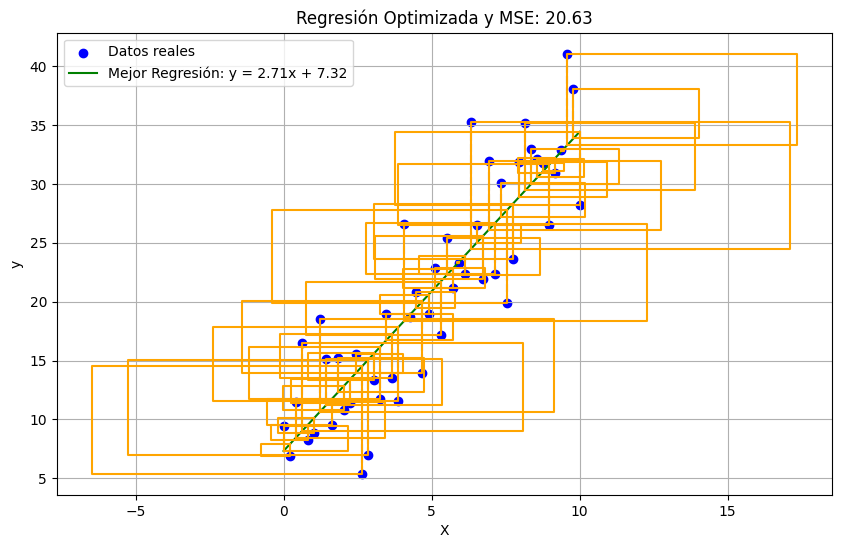

In [8]:
from scipy.optimize import minimize

# Definir una función de pérdida para optimización (minimizar el MSE)
def mse_loss(params, X, y):
    m, b = params
    y_pred = m * X + b
    return mse(y, y_pred)

# Usar SciPy para minimizar la función de pérdida (MSE)
initial_params = [3, 7]  # Valores iniciales para m y b
result = minimize(mse_loss, initial_params, args=(X, y))

# Parámetros optimizados
best_m, best_b = result.x

# Función para graficar la regresión con los parámetros optimizados
def plot_optimized_regression(m, b):
    y_pred = m * X + b
    
    # Calcular MSE
    error = mse(y, y_pred)
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    
    # Graficar los puntos de datos
    plt.scatter(X, y, label="Datos reales", color="blue")
    
    # Graficar la línea de regresión
    plt.plot(X, y_pred, label=f"Mejor Regresión: y = {m:.2f}x + {b:.2f}", color="green")
    
    # Graficar los cuadrados del MSE
    for i in range(len(X)):
        plt.plot([X[i], X[i]], [y[i], y_pred[i]], color="gray", linestyle="--")  # Líneas entre puntos
        # Dibujar cuadrados MSE
        rect_x = [X[i], X[i], X[i] + (y[i] - y_pred[i]), X[i] + (y[i] - y_pred[i]), X[i]]
        rect_y = [y_pred[i], y[i], y[i], y_pred[i], y_pred[i]]
        plt.plot(rect_x, rect_y, 'orange')
    
    plt.title(f"Regresión Optimizada y MSE: {error:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar con los parámetros optimizados
plot_optimized_regression(best_m, best_b)
